In [224]:
import sys
sys.path.append('../')
from IPython.display import Latex
import latexStrings as ls
import numpy as np
import scipy.linalg as linear
from eigenvalues import *
from matplotlib import pyplot as plt
import imageio

In [225]:
def makeNewImg(r, g, b):
    '''
    Auxiliary function.
    Reconstructs image given the SVD decomposition of the RGB matrices
    Parameters
    ----------
    r : (u1, s1, v1) 
        A tuple or list containing SVD decomposition of the red channel
    g : (u2, s2, v2)
        A tuple or list containing SVD decomposition of the green channel
    b : (u3, s3, v3)
        A tuple or list containing SVD decomposition of the blue channel

    Returns
    -------
    newImg : (M,N) uint8 ndarray of the reconstructed image
    '''
    newRed = r[0].dot(r[1]).dot(r[2].T)
    newGreen = g[0].dot(g[1]).dot(g[2].T)
    newBlue = b[0].dot(b[1]).dot(b[2].T)
    newImg = []
    for i in range(len(newRed)):
        newImg.append([])
        for j in range(len(newRed[0])):
            newImg[i].append([newRed[i][j], newGreen[i][j], newBlue[i][j]])
            
    imageio.imwrite('assets/aux.png', np.array(newImg)) #picture is saved and reloaded to effectivly parse it back to uint8
    newImg=imageio.imread('assets/aux.png')
    return newImg

# Ejercicio 7

We first load the image into an array, and separate RGB values into 3 seperate matrices

In [278]:
img = imageio.imread("./assets/small.jpg")
img = img.astype('float')

In [279]:
red = np.array(img[:,:,0])
green = np.array(img[:,:,1])
blue = np.array(img[:,:,2])

Control test to get full rank of matrices

In [280]:
tolerance = 0

In [281]:
u1, s1, v1 = SVD(red,tolerance)
u2, s2, v2 = SVD(green,tolerance)
u3, s3, v3 = SVD(blue,tolerance)

In [282]:
len(s1), len(s2), len(s3)

(115, 116, 116)

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-1.7952520828314568e-10, 255.0000072636285]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


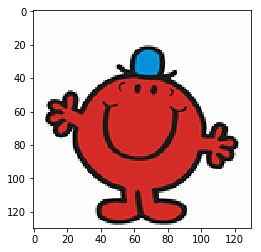

In [283]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3]))
plt.show()

Lets apply economized SVD with a tolerance of 100

In [284]:
tolerance = 100

In [285]:
u1, s1, v1 = SVD(red,tolerance)
u2, s2, v2 = SVD(green,tolerance)
u3, s3, v3 = SVD(blue,tolerance)

In [286]:
len(s1), len(s2), len(s3)

(72, 65, 65)

We can see that the rank of the channel matrices has nearly halved.
But how does this affect the image?

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-11.90704477482152, 271.7185320030302]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


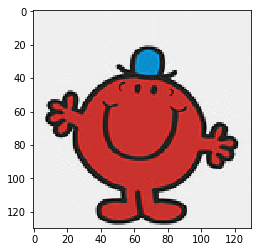

In [287]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3]))
plt.show()

There was basically no loss of detail, except for the white tone in the background

Let's try to another order of magnitud...

In [288]:
tolerance = 1000

In [289]:
u1, s1, v1 = SVD(red,tolerance)
u2, s2, v2 = SVD(green,tolerance)
u3, s3, v3 = SVD(blue,tolerance)

In [290]:
len(s1), len(s2), len(s3)

(16, 11, 11)

The ranks are now a tenth of their original value
How does the image hold up?

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-66.8259040655396, 351.703245859623]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


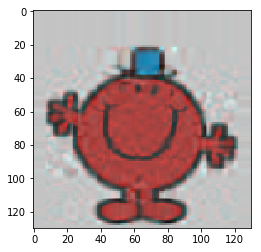

In [291]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3]))
plt.show()

We can now see a clear loss of detail, but can still make out the original image

Let's now see what happens when we consider only the 3 dominant singular values of each channel

In [310]:
n = 3

In [311]:
u1, s1, v1 = SVD(red, n = n)
u2, s2, v2 = SVD(green, n = n)
u3, s3, v3 = SVD(blue, n = n)

In [312]:
len(s1), len(s2), len(s3)

(3, 3, 3)

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-37.04112315012328, 322.05939256192556]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


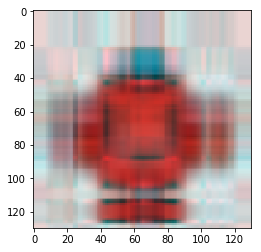

In [313]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3]))
plt.show()

The original image is basically lost, but one could still recognize its original form.

How about the extreme case where only the dominant singular value is kept?

In [314]:
n = 1

In [315]:
u1, s1, v1 = SVD(red, n = n)
u2, s2, v2 = SVD(green, n = n)
u3, s3, v3 = SVD(blue, n = n)

In [316]:
len(s1), len(s2), len(s3)

(1, 1, 1)

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [46.18204408365899, 318.4837751625856]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


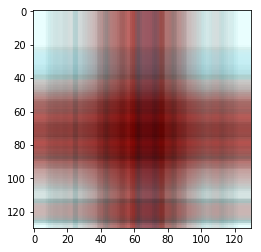

In [317]:
plt.imshow(makeNewImg([u1,s1,v1],[u2,s2,v2],[u3,s3,v3]))
plt.show()

The original image is totally lost, only the dominant colors and their relative position is perceptible